<a href="https://colab.research.google.com/github/mannam95/Deep_Learning_Programming/blob/main/Assignment1/Assignment_1_MLP_Srinath_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install graphviz
!pip install hiddenlayer
!pip install torchviz

In [2]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.datasets import MNIST
import hiddenlayer as hl
from IPython.display import display, Image
from torchviz import make_dot

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

Using cuda device


# Dataset Loader

In [ ]:
# Set fixed random number seed
torch.manual_seed(42)
  
# Prepare CIFAR-10 dataset
train_dataset = MNIST(os.getcwd(), download=True, train=True, transform=transforms.ToTensor())
test_dataset = MNIST(os.getcwd(), download=True, train=False, transform=transforms.ToTensor())

train_Loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=1)
test_Loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=True, num_workers=1)

In [5]:
for i, (inp, tar) in enumerate(train_Loader, 0):
  print(inp.shape)
  break

torch.Size([128, 1, 28, 28])


# Model

In [6]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28*1, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [8]:
model = NeuralNetwork().to(device)

In [9]:
# Define the loss function and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# Train the Model

In [10]:
# Run the training loop
for epoch in range(0, 5): # 5 epochs at maximum
  
  # Print epoch
  print(f'Starting epoch {epoch+1}')
  
  # Set current loss value
  current_loss = 0.0
  
  # Iterate over the DataLoader for training data
  for i, (inputs, targets) in enumerate(train_Loader, 0):

    inputs = inputs.to(device)
    targets = targets.to(device)
    
    # Zero the gradients
    optimizer.zero_grad()
    
    # Perform forward pass
    outputs = model(inputs)

    # Compute loss
    loss = loss_function(outputs, targets)
    
    # Perform backward pass
    loss.backward()
    
    # Perform optimization
    optimizer.step()
    
    # Print statistics
    current_loss += loss.item()
    if (i+1) % 100 == 0:
        print('Loss after mini-batch %5d: %.3f' %
              (i + 1, current_loss / 100))
        current_loss = 0.0

# Process is complete.
print('Training process has finished.')

Starting epoch 1
Loss after mini-batch   100: 1.654
Loss after mini-batch   200: 0.521
Loss after mini-batch   300: 0.379
Loss after mini-batch   400: 0.347
Starting epoch 2
Loss after mini-batch   100: 0.273
Loss after mini-batch   200: 0.276
Loss after mini-batch   300: 0.256
Loss after mini-batch   400: 0.244
Starting epoch 3
Loss after mini-batch   100: 0.208
Loss after mini-batch   200: 0.203
Loss after mini-batch   300: 0.197
Loss after mini-batch   400: 0.185
Starting epoch 4
Loss after mini-batch   100: 0.172
Loss after mini-batch   200: 0.167
Loss after mini-batch   300: 0.154
Loss after mini-batch   400: 0.143
Starting epoch 5
Loss after mini-batch   100: 0.135
Loss after mini-batch   200: 0.132
Loss after mini-batch   300: 0.133
Loss after mini-batch   400: 0.129
Training process has finished.


# Test the Model

In [11]:
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, targets in test_Loader:
        inputs = inputs.to(device)
        targets = targets.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the network on the 10000 test images: 96.32 %


# Visualize the Model

In [12]:
inputs, targets = next(iter(train_Loader))
inputs = inputs.to(device)
y = model(inputs)

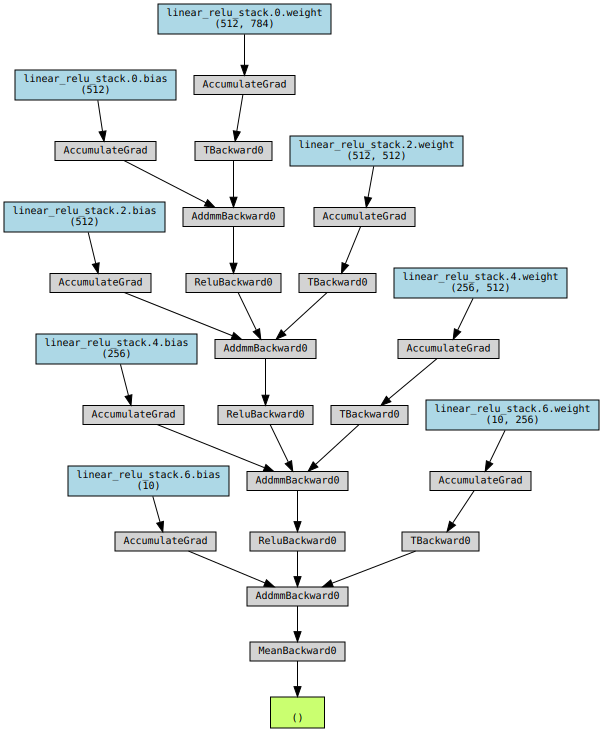

In [13]:
make_dot(y.mean(), params=dict(model.named_parameters()))

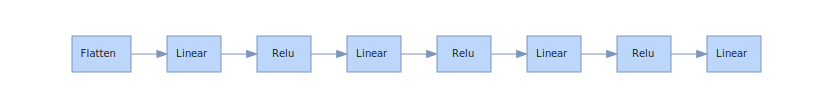

In [15]:
transforms = [ hl.transforms.Prune('Constant') ] # Removes Constant nodes from graph.
graph = hl.build_graph(model, inputs.to(device), transforms=transforms)
graph.theme = hl.graph.THEMES['blue'].copy()
graph